In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Predicting Used Car Prices: A Data Science Exploration

## Introduction

Welcome to this interactive exploration in our Jupyter notebook where we will traverse the intricate landscape of used car prices. As data scientists, our task is to scrutinize, analyze, and interpret complex datasets, teasing out the hidden patterns and underlying structures within the data.

In this notebook, we'll dive into a dataset that captures a diverse spectrum of used car features along with their associated prices. From brand, model, and age to more granular details like mileage and condition, this dataset provides an exciting opportunity to investigate the multifaceted world of used cars.

Our objective here is twofold. Firstly, we aim to gain a deep understanding of our data - its characteristics, distributions, and inherent relationships. Secondly, we aspire to leverage this understanding to build a predictive model that can accurately estimate the price of a used car based on its features.

This journey will involve a variety of techniques and processes central to the field of data science, including but not limited to:

- **Data Understanding and Exploration:** Through Exploratory Data Analysis (EDA), we will familiarize ourselves with the dataset, identify patterns, and generate hypotheses about potential relationships in the data.

- **Data Preparation:** We will clean the data, handle missing values, and perform necessary transformations to prepare it for modeling. This step may also include feature engineering, where we create new variables from existing ones to enhance our model's predictive power.

- **Modeling:** We'll apply suitable machine learning algorithms to the data to construct a predictive model. We will iterate over different models, tune hyperparameters, and assess their performance to select the best model.

- **Evaluation and Validation:** The performance of our model will be evaluated using suitable metrics and validation techniques to ensure its reliability and robustness.

It's essential to remember that data science is not a linear process, but rather an iterative one. Throughout our journey, we may loop back to earlier steps based on what we learn from subsequent stages.

So, without further ado, let's dive into this data science expedition, and uncover the story that lies within our used car prices dataset!

Let's read the data

In [2]:
df = pd.read_csv('data_cars_train.csv')

Generally, the first thing is always to take a look at the dataset, to get an idea of what the features are like, and what it looks like.

In [3]:
df.sample(10)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
117873,Jeep,Cherokee Latitude,2016,120108.0,"Pentastar 3.2L V-6 DOHC, engine with 271HP",Automatic,Four-wheel Drive,Gasoline,21-28,Billet Silver Metallic Clearcoat,Black,0.0,0.0,1.0,Glendale Chrysler Dodge Jeep RAM,NaN,4.5,271.0,NaN,18840.0
59164,Nissan,Maxima SV,2022,22518.0,3.5L V6 24V GDI DOHC,Automatic CVT,Front-wheel Drive,Gasoline,20-30,Brilliant Silver Metallic,Charcoal,0.0,1.0,0.0,Hertz Car Sales Hartford,NaN,4.6,1.0,524.0,26490.0
130547,Porsche,Panamera Sport Turismo 4S,2018,55249.0,2.9L V6 24V GDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,All-wheel Drive,Gasoline,20-26,Chalk,Black,0.0,0.0,1.0,Porsche Beachwood,4.9,4.7,3.0,NaN,70990.0
116846,INFINITI,QX60 Pure,2019,65894.0,3.5L V6 24V GDI DOHC,Automatic CVT,All-wheel Drive,Gasoline,19-26,Black Obsidian,Graphite,1.0,1.0,0.0,CDJR of Tampa Bay,NaN,4.5,57.0,546.0,26956.0
8524,Cadillac,Escalade Luxury,2017,91379.0,6.2L V8 16V GDI OHV,8-Speed Automatic,Rear-wheel Drive,Gasoline,15-22,Gray,NaN,1.0,0.0,1.0,NTX Auto,3.6,4.4,37.0,NaN,38555.0
161673,Ford,Expedition EL Limited,2014,164422.0,5.4L V8 24V MPFI SOHC Flexible Fuel,6-Speed Automatic,Four-wheel Drive,E85 Flex Fuel,13-18,Ingot Silver Metallic,Camel,0.0,0.0,1.0,Bob Penkhus Mitsubishi,4.6,4.5,14.0,100.0,15582.0
120166,Subaru,Outback 3.6R Limited,2017,43767.0,3.6L H6 24V MPFI DOHC,Automatic CVT,All-wheel Drive,Gasoline,20-27,Wilderness Green Metallic,Ivory,1.0,0.0,0.0,Auto's of Chicago,4.2,4.8,368.0,NaN,26555.0
21751,Chevrolet,Tahoe LT,2021,63425.0,5.3L V8 16V GDI OHV,10-Speed Automatic,Four-wheel Drive,Gasoline,16-20,Summit White,Gideon,0.0,1.0,0.0,Rick Hendrick Chevrolet Buick GMC,4.7,4.4,41.0,496.0,48499.0
95930,Volkswagen,Tiguan 2.0T S,2022,39132.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,22-29,Pure White,Titan Black,0.0,1.0,0.0,Suntrup Volkswagen,4.8,3.6,8.0,1430.0,26267.0
7267,Ford,EcoSport Titanium,2020,61039.0,2.0L I4 16V GDI DOHC,6-Speed Automatic,Four-wheel Drive,Gasoline,23-29,Shadow Black,Ebony Black,0.0,1.0,0.0,Rick Ridings Ford,4.6,4.7,65.0,NaN,18790.0


## Exploratory Data Analisys - EDA

First, some easy checks to inspect the values

In [4]:
df.describe().T.applymap('{:.2f}'.format)

/var/folders/c9/_cn06k4s2d54y803b05hm80c0000gp/T/ipykernel_52375/4121913170.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().T.applymap('{:.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
year,190523.00,2017.80,5.07,1917.00,2016.00,2019.00,2021.00,2023.00
mileage,190392.00,55739.66,43551.29,0.00,23232.75,45529.50,78399.25,999999.00
accidents_or_damage,184508.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
one_owner,182710.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
personal_use_only,184351.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
seller_rating,137147.00,4.16,0.81,1.00,3.80,4.50,4.70,5.00
driver_rating,182611.00,4.62,0.28,1.00,4.50,4.70,4.80,5.00
driver_reviews_num,190523.00,89.65,115.19,0.00,14.00,51.00,119.00,1025.00
price_drop,102267.00,1009.76,1445.49,100.00,383.00,650.00,1007.00,170995.00
price,190523.00,37826.94,2291088.18,1.00,19600.00,27990.00,39477.00,1000000000.00


In [5]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
manufacturer,190523,30,Ford,20005
model,190523,7915,Fusion SE,780
engine,186695,3850,2.0L I4 16V GDI DOHC Turbo,18877
transmission,188045,671,6-Speed Automatic,37089
drivetrain,185029,29,Front-wheel Drive,60012
fuel_type,184700,24,Gasoline,161135
mpg,155096,625,19-26,4070
exterior_color,188341,4642,Black,15117
interior_color,176243,2637,Black,71645
seller_name,188390,17033,Gateway Classic Cars,423


In [6]:
df.isnull().sum()/len(df)

manufacturer           0.000000
model                  0.000000
year                   0.000000
mileage                0.000688
engine                 0.020092
transmission           0.013006
drivetrain             0.028836
fuel_type              0.030563
mpg                    0.185946
exterior_color         0.011453
interior_color         0.074952
accidents_or_damage    0.031571
one_owner              0.041008
personal_use_only      0.032395
seller_name            0.011195
seller_rating          0.280155
driver_rating          0.041528
driver_reviews_num     0.000000
price_drop             0.463230
price                  0.000000
dtype: float64

The most striking thing is undoubtedly the enormous dispersion in the price, our "main" variable. It seems to have some incorrectly loaded or erroneous values (especially due to that value of 1,000,000,000).

Let's check the tail of the distribution

In [7]:
print(f"Percentil 95: {np.percentile(df['price'], q=95)}")
print(f"Percentil 99: {np.percentile(df['price'], q=99)}")
print(f"Percentil 99.3: {np.percentile(df['price'], q=99.3)}")
print(f"Percentil 99.5: {np.percentile(df['price'], q=99.5)}")
print(f"Percentil 99.8: {np.percentile(df['price'], q=99.8)}")
print(f"Percentil 99.9: {np.percentile(df['price'], q=99.9)}")

Percentil 95: 68880.0
Percentil 99: 109990.0
Percentil 99.3: 124900.0
Percentil 99.5: 139900.0
Percentil 99.8: 193980.1640000001
Percentil 99.9: 235406.3000000271


Now, if we filter the dataset, we see

In [8]:
upper_limit = np.percentile(df['price'], q=99.9)

df[df['price']<upper_limit].describe().T.applymap('{:.2f}'.format)

/var/folders/c9/_cn06k4s2d54y803b05hm80c0000gp/T/ipykernel_52375/78218377.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df['price']<upper_limit].describe().T.applymap('{:.2f}'.format)


,count,mean,std,min,25%,50%,75%,max
year,190332.00,2017.80,5.05,1917.00,2016.00,2019.00,2021.00,2023.00
mileage,190202.00,55788.83,43542.44,0.00,23295.00,45575.00,78451.50,999999.00
accidents_or_damage,184325.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
one_owner,182546.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
personal_use_only,184170.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
seller_rating,137039.00,4.16,0.81,1.00,3.80,4.50,4.70,5.00
driver_rating,182485.00,4.62,0.28,1.00,4.50,4.70,4.80,5.00
driver_reviews_num,190332.00,89.73,115.22,0.00,14.00,51.00,119.00,1025.00
price_drop,102168.00,1000.74,1270.19,100.00,382.00,649.00,1006.00,50000.00
price,190332.00,32219.01,20327.66,1.00,19597.75,27988.00,39395.50,235000.00


In [9]:
df[df['price']<upper_limit].select_dtypes(include='object').describe().T

,count,unique,top,freq
manufacturer,190332,30,Ford,19993
model,190332,7882,Fusion SE,780
engine,186515,3834,2.0L I4 16V GDI DOHC Turbo,18875
transmission,187862,670,6-Speed Automatic,37089
drivetrain,184858,29,Front-wheel Drive,60011
fuel_type,184522,24,Gasoline,160961
mpg,154966,625,19-26,4070
exterior_color,188155,4628,Black,15092
interior_color,176071,2626,Black,71547
seller_name,188204,17024,Gateway Classic Cars,423


We still see a very high dispersion, so we can plot to understand a little more. Even though we're only looking at the price, remember that it's our main variable.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

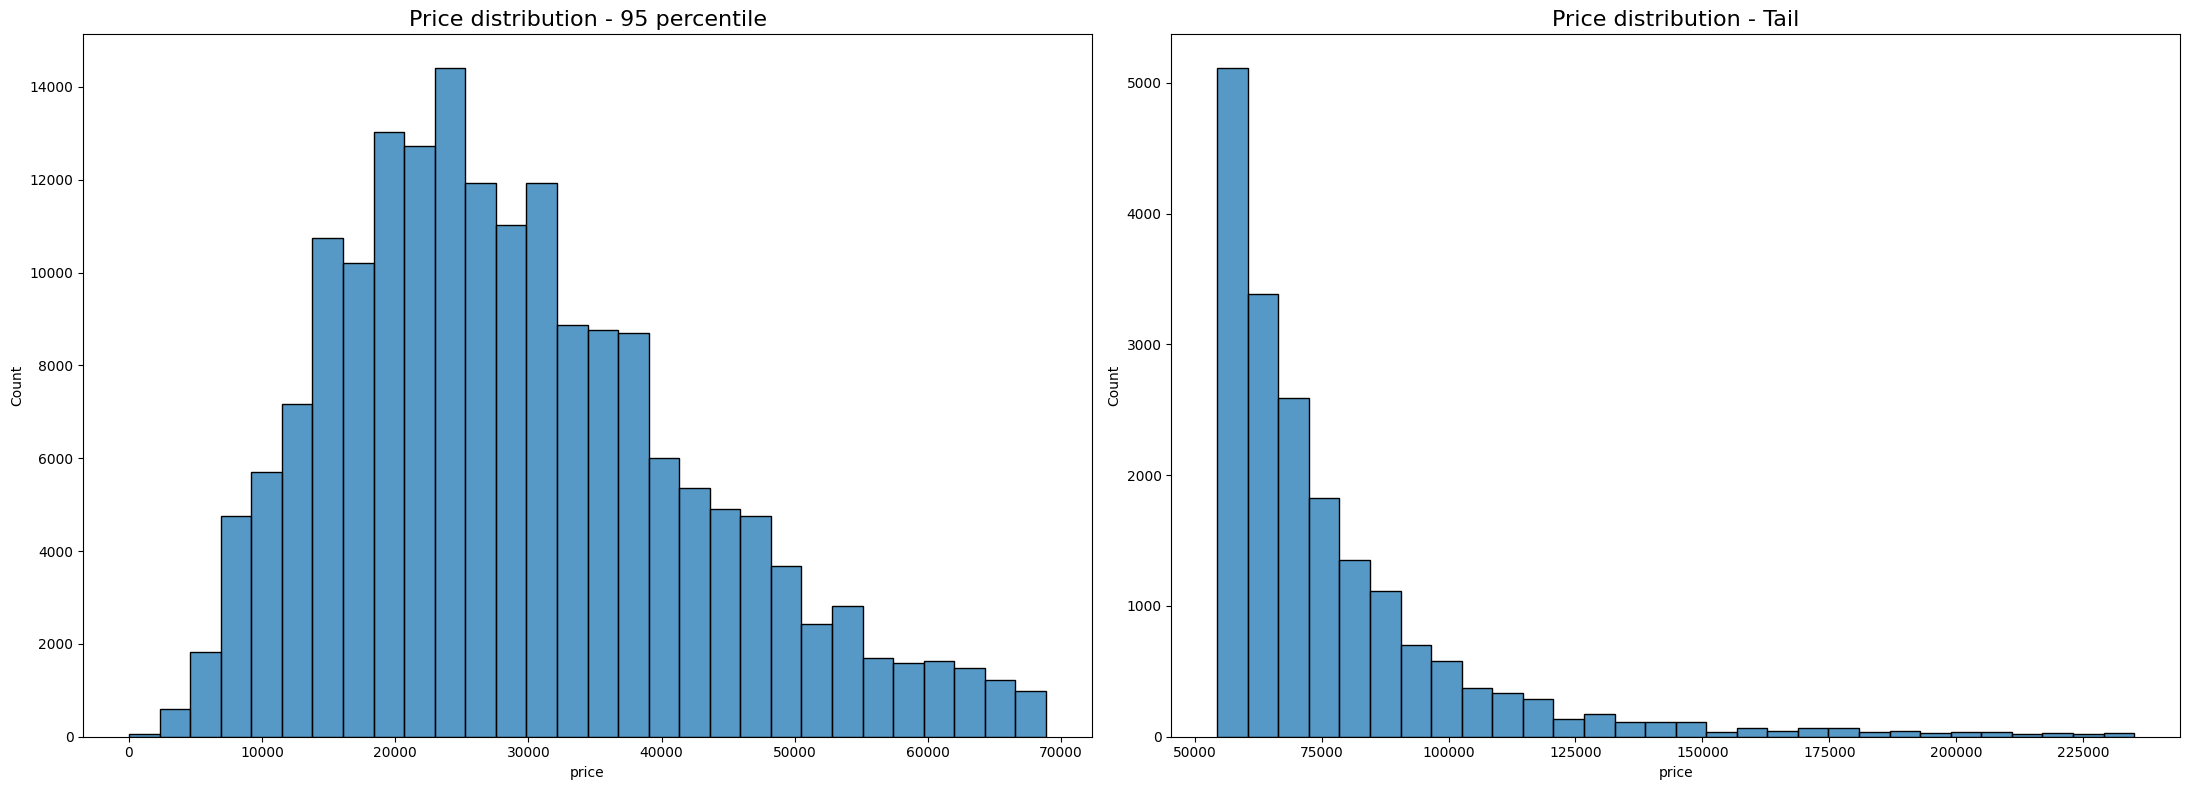

In [11]:
price_90 = np.percentile(df['price'], q=90)
price_95 = np.percentile(df['price'], q=95)
price_99_9 = np.percentile(df['price'], q=99.9)

data_95 = df.loc[df['price']<price_95, ['price']]
data_95.reset_index(inplace=True, drop=True)

data_tail = df.loc[df['price'].between(price_90,price_99_9), ['price']]
data_tail.reset_index(inplace=True, drop=True)

fig, axes = plt.subplots(1, 2, figsize=(22, 8)) 

sns.histplot(data=data_95, x='price', ax=axes[0], bins=30) 
axes[0].set_title(f'Price distribution - 95 percentile', fontsize=16)

sns.histplot(data=data_tail, x='price', ax=axes[1], bins=30) 
axes[1].set_title(f'Price distribution - Tail', fontsize=16)

plt.tight_layout()
plt.show()

So, we are going to work just with the prices below 150.000

In [12]:
df = df[df['price']<150000]
df.reset_index(drop=True, inplace=True)

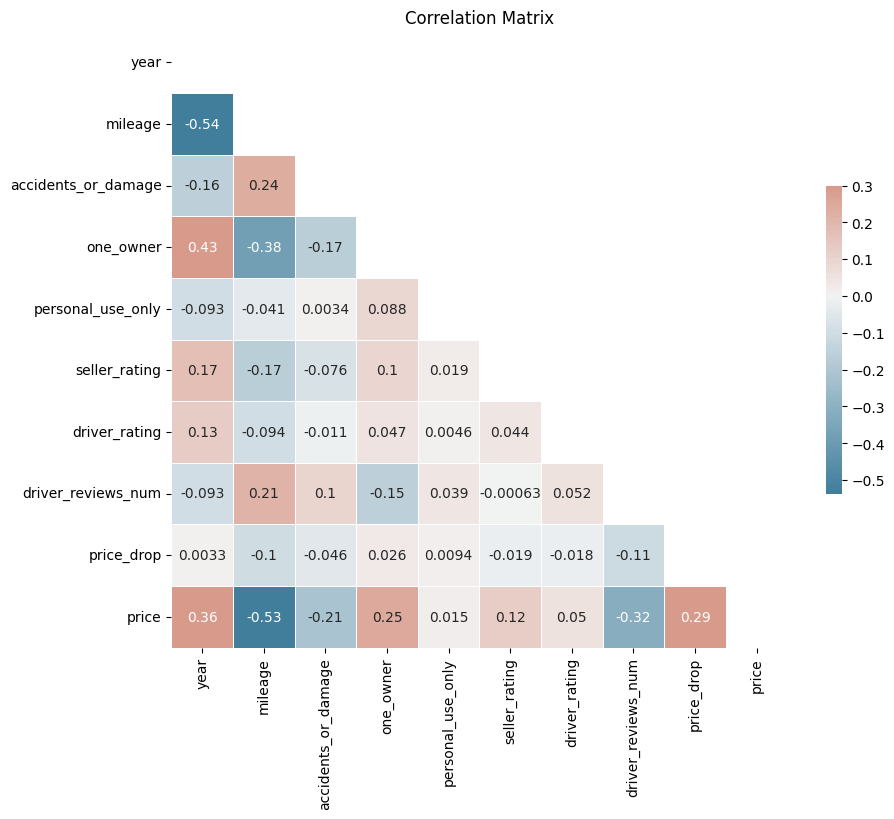

In [13]:
# Compute the correlation matrix
corr = df.select_dtypes(exclude='object').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Matrix")

plt.show()

Now, we can explore the categorical features. First check the first values of each category

In [14]:
for i in df.select_dtypes(include='object').columns:
    vals = round(df[i].value_counts(normalize=True)[:15].sum(),4)
    print(f'Column: {i}, total in the first 15 values: {vals}','\n', '')
    print(df[i].value_counts()[:15])
    print('************','\n')

Column: manufacturer, total in the first 15 values: 0.7676 
 
manufacturer
Ford             19987
Toyota           14944
Chevrolet        13879
Nissan           12065
Jeep             10508
Mercedes-Benz     9974
BMW               9464
Honda             9429
Kia               8726
GMC               7355
Dodge             6378
Subaru            6191
Volkswagen        5969
Hyundai           5477
Lexus             5307
Name: count, dtype: int64
************ 

Column: model, total in the first 15 values: 0.0508 
 
model
Fusion SE              780
Sportage LX            726
Corolla LE             704
GLC 300 Base 4MATIC    669
Tundra SR5             663
Optima LX              662
Sentra SV              652
Explorer XLT           640
Sorento LX             613
Wrangler Sport         607
Odyssey EX-L           593
Edge SEL               587
Rogue SV               587
Focus SE               583
RX 350 Base            582
Name: count, dtype: int64
************ 

Column: engine, total in the fir

## Frist Model

Transformation of some columns

In [ ]:
df['drivetrain'].value_counts()

In [15]:
dive_train_map = {'Front-wheel Drive':'Front Wheel Driver',
                          'FWD':'Front Wheel Driver',
                          'Front-Wheel Drive':'Front Wheel Driver',
                          'Four-wheel Drive':'Four Wheel Driver',
                          'Four-Wheel Drive':'Four Wheel Driver',
                          'Four Wheel Drive':'Four Wheel Driver',
                          '4WD':'Four Wheel Driver',
                          'All-wheel Drive':'All Wheel Driver',
                          'All-Wheel Drive':'All Wheel Driver',
                          'AWD':'All Wheel Driver',
                          'Rear-wheel Drive':'Rear Wheel Driver',
                          'RWD':'Rear Wheel Driver'}

df['drivetrain'].map(dive_train_map).fillna(value='Other').value_counts(normalize=True)

drivetrain
Front Wheel Driver    0.324505
All Wheel Driver      0.306635
Four Wheel Driver     0.208985
Rear Wheel Driver     0.130707
Other                 0.029168
Name: proportion, dtype: float64

In [16]:
df['drivetrain'] = df['drivetrain'].map(dive_train_map).fillna(value='Others')

In [ ]:
cp_divetrain = df['drivetrain'].unique()

#### Categorical Features

In [17]:
cat_features = ['manufacturer','transmission','drivetrain','fuel_type']

Manufacturer

In [19]:
len(df['manufacturer'].value_counts().index)

30

In [20]:
cp_manufacturer = df['manufacturer'].value_counts().index[:20]
df['manufacturer'] = df['manufacturer'].where(df['manufacturer'].isin(cp_manufacturer), 'Other')


Transmition

In [21]:
cp_transmission = df['transmission'].value_counts().index[:10]
df['transmission'] = df['transmission'].where(df['transmission'].isin(cp_transmission), 'Other')

Fuel Type

In [22]:
cp_fuel_type = ['Gasoline','Hybrid','Diesel','E85 Flex Fuel','Electric']
df['fuel_type'] = df['fuel_type'].where(df['fuel_type'].isin(cp_fuel_type), 'Other')

In [ ]:
for col in cat_features:
    print(col,'\n')
    print(df[col].value_counts())
    print('*****')

In [ ]:
for col in cat_features:
    categorias_preservar = df[col].value_counts().index[:15]
    df[col] = df[col].where(df[col].isin(categorias_preservar), 'others')

In [ ]:
for i in cat_features:
    vals = round(df[i].value_counts(normalize=True)[:11].sum(),4)
    print(f'Column: {i}, total in the first 10 values: {vals}','\n', '')
    print(df[i].value_counts()[:15])
    print('************','\n')

In [ ]:
for i in cat_features:
    vals = round(df[i].value_counts(normalize=True)[:11].sum(),4)
    print(f'Column: {i}, total in the first 10 values: {vals}','\n', '')
    print(df[i].value_counts(normalize=True)[:15])
    print('************','\n')

#### Numerical Features

Miles per Galon transform

In [23]:
def get_mpg(x):
    x = str(x)
    if x == 'nan':
        return np.nan
    elif len(x) <= 2:
        return float(x)
    else:
        return (float(x.split('-')[0])+float(x.split('-')[1]))/2

In [24]:
df['mpg'] = df['mpg'].map(get_mpg)

In [25]:
num_features = ['year','mileage', 'mpg', 'driver_reviews_num', 'seller_rating', 'driver_rating']

#### Dummie variables

In [26]:
dum_variables = ['accidents_or_damage', 'one_owner','personal_use_only']

### Dataset filter

In [27]:
only_features = dum_variables + cat_features + num_features

In [28]:
all_features = dum_variables + cat_features + num_features
all_features.append('price')

In [29]:
all_features

['accidents_or_damage',
 'one_owner',
 'personal_use_only',
 'manufacturer',
 'transmission',
 'drivetrain',
 'fuel_type',
 'year',
 'mileage',
 'mpg',
 'driver_reviews_num',
 'seller_rating',
 'driver_rating',
 'price']

In [30]:
df[all_features].isnull().sum()/len(df)

accidents_or_damage    0.031535
one_owner              0.040751
personal_use_only      0.032336
manufacturer           0.000000
transmission           0.000000
drivetrain             0.000000
fuel_type              0.000000
year                   0.000000
mileage                0.000685
mpg                    0.185150
driver_reviews_num     0.000000
seller_rating          0.279875
driver_rating          0.040008
price                  0.000000
dtype: float64

In [31]:
data = df[all_features].copy()

In [32]:
data.head()

,accidents_or_damage,one_owner,personal_use_only,manufacturer,transmission,drivetrain,fuel_type,year,mileage,mpg,driver_reviews_num,seller_rating,driver_rating,price
0,0.0,1.0,1.0,Ford,10-Speed Automatic,Four Wheel Driver,Gasoline,2023,1012.0,NaN,0.0,4.9,NaN,110795.0
1,0.0,1.0,0.0,Other,9-Speed Automatic,Front Wheel Driver,Gasoline,2019,73925.0,23.5,86.0,4.5,4.7,24063.0
2,1.0,0.0,0.0,BMW,8-Speed Automatic,All Wheel Driver,Gasoline,2012,101698.0,19.5,8.0,3.3,4.7,18999.0
3,0.0,1.0,0.0,Hyundai,8-Speed Automatic,Front Wheel Driver,Gasoline,2021,42777.0,32.0,46.0,NaN,4.8,27498.0
4,0.0,1.0,1.0,GMC,Automatic,All Wheel Driver,Gasoline,2015,113327.0,19.5,123.0,NaN,4.6,14999.0


In [33]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [34]:
len(data)/len(df)

0.5713849072512648

In [35]:
for i in dum_variables:
    data[i] = data[i].astype(int)

In [36]:
data.isnull().sum()

accidents_or_damage    0
one_owner              0
personal_use_only      0
manufacturer           0
transmission           0
drivetrain             0
fuel_type              0
year                   0
mileage                0
mpg                    0
driver_reviews_num     0
seller_rating          0
driver_rating          0
price                  0
dtype: int64

First check hiperpameter tunning on small data

In [37]:
data.shape

(108426, 14)

In [39]:
data_small = data.sample(n=25000, random_state=23).copy()
data_small.reset_index(inplace=True,drop=True)

In [ ]:
data_small.head()

Imports

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.preprocessing import FunctionTransformer
import xgboost

In [41]:
print(xgboost.__version__)

2.0.3


In [ ]:
class DummyEncoder:

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X
    
    def get_feature_names(self):
        return self.columns_

In [42]:
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  
])

num_pipeline = Pipeline([
    ('scaler', RobustScaler())  
])

dum_pipeline = Pipeline([
    ('identity', FunctionTransformer()) 
])

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('dum', dum_pipeline, dum_variables)
    ])

In [44]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror')) #
])

In [45]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['year', 'mileage', 'mpg',
                                                   'driver_reviews_num',
                                                   'seller_rating',
                                                   'driver_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer',
                                                   'transmission', 'drivetrain',
                                                   'fuel_type']),
                                                 ('dum',
                                                  Pipeline(steps=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [46]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 4],
    'regressor__colsample_bytree': [0.5, 0.6]
}

In [47]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=4)

#### Split the data

In [48]:
from sklearn.model_selection import train_test_split

In [55]:
X = data_small[only_features].copy()
y = data_small['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Train score:", grid_search.score(X_train, y_train))
print("Test score:", grid_search.score(X_test, y_test))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.3s
[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=4, regressor__n_estimators=100; total time=   0.2s
[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; total time=   0.3s
[CV] END regressor__colsample_bytree=0.5, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=200; tota

In [57]:
type(grid_search)

sklearn.model_selection._search.GridSearchCV

In [58]:
X_test.head()

,accidents_or_damage,one_owner,personal_use_only,manufacturer,transmission,drivetrain,fuel_type,year,mileage,mpg,driver_reviews_num,seller_rating,driver_rating
6868,0,0,0,Subaru,Other,All Wheel Driver,Gasoline,2012,126632.0,24.0,68.0,4.8,4.3
24016,1,1,1,Mazda,6-Speed Automatic,Front Wheel Driver,Gasoline,2018,30758.0,31.5,206.0,4.7,4.8
9668,0,0,0,Toyota,5-Speed Automatic,Four Wheel Driver,Gasoline,2019,75251.0,18.5,190.0,4.8,4.8
13640,0,1,1,Nissan,Automatic CVT,Front Wheel Driver,Gasoline,2020,33777.0,25.0,18.0,4.6,4.9
14018,0,0,1,Other,5-Speed Automatic,Rear Wheel Driver,Gasoline,2006,77359.0,21.5,83.0,4.7,4.5


In [59]:
grid_search.predict(X_test)

array([ 9222.296, 21397.666, 37453.227, ..., 22198.633, 42916.83 ,
       30624.92 ], dtype=float32)

### Guardar modelo

1. Intanciar el pipeline completo y entrenar

In [60]:
model_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror',colsample_bytree= 0.6,
                      learning_rate = 0.1, max_depth= 4, n_estimators =200)) #
])

In [65]:
model_xgb.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['year', 'mileage', 'mpg',
                                                   'driver_reviews_num',
                                                   'seller_rating',
                                                   'driver_rating']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer',
                                                   'transmission', 'drivetrain',
                                                   'fuel_type']),
                                                 ('dum',
                                                  Pipeline(steps=...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

2. Guardar

In [61]:
import pickle

In [66]:
# Guardar el modelo en un archivo
with open('models/xgb_model_v1.pkl', 'wb') as file:
    pickle.dump(model_xgb, file)


Comprobar que es lo mismo

In [67]:
with open('models/xgb_model_v1.pkl', 'rb') as file:
    model_v1 = pickle.load(file)

In [68]:
model_v1.predict(X_test)

array([ 9222.296, 21397.666, 37453.227, ..., 22198.633, 42916.83 ,
       30624.92 ], dtype=float32)

Load model for the whole dataset

In [ ]:
data.info()

In [ ]:
X = data[all_features].copy()
y = data['price'].copy()

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror',colsample_bytree= 0.5, gamma = 0, 
                      learning_rate = 0.2, max_depth= 7, n_estimators =300)) #
])


In [ ]:
with open('/kaggle/working/xgb_model_v1.pkl', 'rb') as file:
    model_v1 = pickle.load(file)

In [ ]:
pipeline_xgb.fit(X_train, y_train)
#pipeline_xgb.fit(X_train, y)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predecir los valores de las características de prueba
y_pred = pipeline_xgb.predict(X_test)

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R^2:', r2)


In [ ]:
mae/data['price'].mean()

In [ ]:
import pickle

# Guardar el modelo en un archivo
with open('/kaggle/working/xgb_model.pkl', 'wb') as file:
    pickle.dump(pipeline_xgb, file)

## Variables for app

Categorical Features

In [ ]:
{k:data[k].unique() for k in cat_features}

Numerical Features

In [ ]:
{k:(data[k].min(), data[k].max()) for k in num_features}

Dummie Variables

In [ ]:
{k:data[k].unique() for k in dum_variables}

In [ ]:
dum_variables

In [ ]:
import xgboost

In [ ]:
print(xgboost.__version__)

In [ ]:
import sklearn

print(sklearn.__version__)

In [ ]:
print(pd.__version__)

In [ ]:
!python --version

## Neural Network

In [ ]:
data.head()

In [ ]:
pd.qcut(data['year'],q = 10)